In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files 
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahilarora3117","key":"4589dadf06cce4d9191f64a32482871b"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d dadajonjurakuziev/movieposter

 99% 830M/838M [00:28<00:00, 40.8MB/s]
100% 838M/838M [00:28<00:00, 31.3MB/s]


In [ ]:
accuracy=62.24

In [ ]:
! cp /content/movieposter.zip /content/drive/MyDrive/DV_Movie_Project/

cp: cannot stat '/content/movieposter.zip': No such file or directory


In [ ]:
! unzip /content/drive/MyDrive/DV_Movie_Project/movieposter.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_41K/img_41K/5496.jpg  
  inflating: img_41K/img_41K/5497.jpg  
  inflating: img_41K/img_41K/5498.jpg  
  inflating: img_41K/img_41K/5499.jpg  
  inflating: img_41K/img_41K/55.jpg  
  inflating: img_41K/img_41K/550.jpg  
  inflating: img_41K/img_41K/5500.jpg  
  inflating: img_41K/img_41K/5501.jpg  
  inflating: img_41K/img_41K/5502.jpg  
  inflating: img_41K/img_41K/5503.jpg  
  inflating: img_41K/img_41K/5504.jpg  
  inflating: img_41K/img_41K/5505.jpg  
  inflating: img_41K/img_41K/5506.jpg  
  inflating: img_41K/img_41K/5507.jpg  
  inflating: img_41K/img_41K/5508.jpg  
  inflating: img_41K/img_41K/5509.jpg  
  inflating: img_41K/img_41K/551.jpg  
  inflating: img_41K/img_41K/5510.jpg  
  inflating: img_41K/img_41K/5511.jpg  
  inflating: img_41K/img_41K/5512.jpg  
  inflating: img_41K/img_41K/5513.jpg  
  inflating: img_41K/img_41K/5514.jpg  
  inflating: img_41K/img_41K/5515.jpg  
  inflating: img_41K/img_41K/5516

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
data = pd.read_csv('/content/duplicate_free_41K.csv')
truncat = data[:10000]
truncat

,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10003,https://m.media-amazon.com/images/M/MV5BODczOT...,Dark Highlands,2018,5.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
9996,10004,https://m.media-amazon.com/images/M/MV5BN2Y3MD...,Room for Murder,2018,5.0,thriller,0,0,0,0,0,0,0,0,0,0,0,0,1
9997,10005,https://m.media-amazon.com/images/M/MV5BMzgzZW...,Hot Air,2018,5.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
9998,10006,https://m.media-amazon.com/images/M/MV5BNGUyMz...,Funny Story,2018,5.0,"comedy, drama",0,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
pic_width = 224
pic_height = 224
X_train = []
X_test = []
X_val = []
for i in tqdm(range(int(truncat.shape[0]))):
  if i < int(truncat.shape[0]*0.60)-1 :
    path = '/content/img_41K/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X_train.append(img)
  elif i > int(truncat.shape[0]*0.60)-1 and i < int(truncat.shape[0]*0.8)-1 :
    path = '/content/img_41K/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X_test.append(img)  
  else :
    path = '/content/img_41K/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X_val.append(img)


100%|██████████| 10000/10000 [00:30<00:00, 326.78it/s]


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

'mystery'

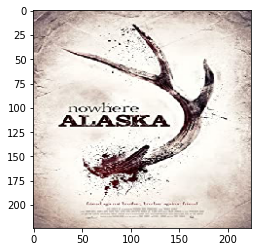

In [ ]:
plt.imshow(X_train[2005])
data['genre'][2005]

In [ ]:
y_ge = truncat.drop(['id','poster','title','year','rating','genre', 'animation', 'sci-fi', 'short', 'crime', 'mystery', 'adventure'], axis = 1)
y = y_ge.to_numpy()

In [ ]:
train_size = int(X_train.shape[0])
test_size = int(X_test.shape[0])

In [ ]:
y_train = []
y_test = []
y_val = []
for i in range(train_size):
  y_train.append(y[i])
y_train = np.array(y_train)

for i in range(train_size,train_size+test_size):
  y_test.append(y[i])
y_test = np.array(y_test)

for i in range(train_size+test_size,10000):
  y_val.append(y[i])
y_val = np.array(y_val)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())



model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     1

In [ ]:
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50 , validation_data=(X_val, y_val), callbacks=[callback],batch_size= 64)

Epoch 1/50
94/94 [==============================] - 23s 106ms/step - loss: 0.6377 - accuracy: 0.2684 - val_loss: 0.5792 - val_accuracy: 0.1144
Epoch 2/50
94/94 [==============================] - 8s 85ms/step - loss: 0.4731 - accuracy: 0.3509 - val_loss: 0.6263 - val_accuracy: 0.2602
Epoch 3/50
94/94 [==============================] - 8s 88ms/step - loss: 0.4231 - accuracy: 0.3827 - val_loss: 0.6720 - val_accuracy: 0.1523
Epoch 4/50
94/94 [==============================] - 8s 85ms/step - loss: 0.3935 - accuracy: 0.4129 - val_loss: 0.5443 - val_accuracy: 0.2433
Epoch 5/50
94/94 [==============================] - 8s 86ms/step - loss: 0.3524 - accuracy: 0.4702 - val_loss: 0.5610 - val_accuracy: 0.2418
Epoch 6/50
94/94 [==============================] - 8s 86ms/step - loss: 0.2848 - accuracy: 0.5403 - val_loss: 0.5634 - val_accuracy: 0.2038
Epoch 7/50
94/94 [==============================] - 8s 85ms/step - loss: 0.2124 - accuracy: 0.6006 - val_loss: 0.5781 - val_accuracy: 0.2952
Epoch 8/50


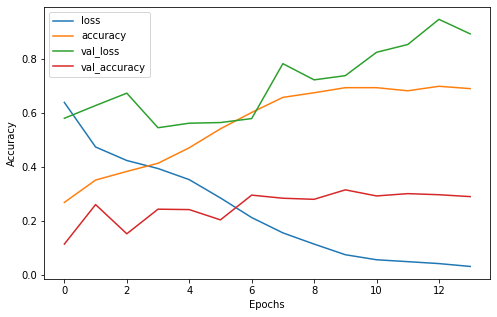

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [ ]:
ev = model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 16ms/step - loss: 1.0623 - accuracy: 0.2016


In [ ]:
pred = model.predict(X_test)


In [ ]:
acc = 0
testval = y_test.tolist()
for i in range(len(pred)):
  if (testval[i][np.argmax(pred[i])] == 1):
    acc +=1




In [ ]:
print("Accuracy: " + str(accuracy) + "%")

Accuracy: 56.29%


In [ ]:
model.save('custom_model_1') 

INFO:tensorflow:Assets written to: custom_model_1/assets


In [ ]:
!zip -r custom_model_1.zip custom_model_1/

updating: custom_model_1/ (stored 0%)
  adding: custom_model_1/keras_metadata.pb (deflated 94%)
  adding: custom_model_1/assets/ (stored 0%)
  adding: custom_model_1/variables/ (stored 0%)
  adding: custom_model_1/variables/variables.index (deflated 73%)
  adding: custom_model_1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: custom_model_1/saved_model.pb (deflated 89%)


Original
comedy, horror
Predicted :
action comedy


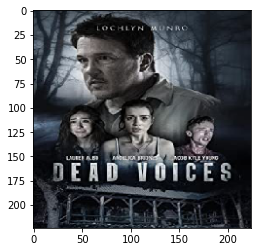

In [ ]:
img = image.load_img('/content/img_41K/img_41K/2000.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = y_ge.columns
y_prob = model.predict(img)
arr = np.array(y_prob)
top2 = np.argsort(y_prob[0])
print("Original")
print(data['genre'][2000])
print("Predicted :")
print(genres[top2[0]], genres[top2[1]])


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

In [ ]:
base_model=ResNet50(weights=None ,include_top=False, input_shape=(224, 224, 3))
base_model.trainble = True

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)
x = Dense(7, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs = 10)

Epoch 1/10
188/188 [==============================] - 82s 349ms/step - loss: 3.8409 - accuracy: 0.2064 - val_loss: 3.1575 - val_accuracy: 0.2348
Epoch 2/10
188/188 [==============================] - 65s 345ms/step - loss: 3.6391 - accuracy: 0.2244 - val_loss: 3.4201 - val_accuracy: 0.1953
Epoch 3/10
188/188 [==============================] - 67s 358ms/step - loss: 3.6404 - accuracy: 0.2247 - val_loss: 3.4829 - val_accuracy: 0.2293
Epoch 4/10
188/188 [==============================] - 70s 373ms/step - loss: 3.5926 - accuracy: 0.2422 - val_loss: 3.6726 - val_accuracy: 0.2273
Epoch 5/10
188/188 [==============================] - 70s 374ms/step - loss: 3.6026 - accuracy: 0.2309 - val_loss: 3.8467 - val_accuracy: 0.2228
Epoch 6/10
188/188 [==============================] - 70s 375ms/step - loss: 3.5458 - accuracy: 0.2424 - val_loss: 3.8841 - val_accuracy: 0.2248
Epoch 7/10
188/188 [==============================] - 70s 375ms/step - loss: 3.5533 - accuracy: 0.2369 - val_loss: 3.9545 - val_ac

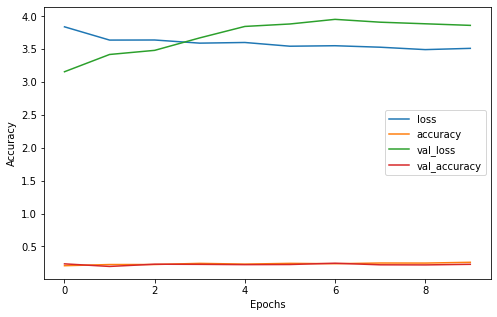

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [ ]:
ev  = model.evaluate(X_test,y_test)


63/63 [==============================] - 6s 101ms/step - loss: 3.8768 - accuracy: 0.1931


In [ ]:
pred = model.predict(X_test)


In [ ]:
acc = 0
testval = y_test.tolist()
for i in range(len(pred)):
  if (testval[i][np.argmax(pred[i])] == 1):
    acc +=1



In [ ]:
print("Accuracy: " + str(accuracy) + "%")

Accuracy: 62.24%


Original
horror
Predicted :
horror fantasy


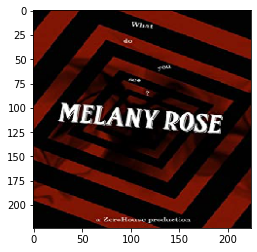

In [ ]:
img = image.load_img('/content/img_41K/img_41K/2002.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = y_ge.columns
y_prob = model.predict(img)
arr = np.array(y_prob)
top2 = np.argsort(y_prob[0])
print("Original")
print(data['genre'][2002])
print("Predicted :")
print(genres[top2[0]], genres[top2[1]])